# 📘 Evaluación de Métricas - Proyecto Profe Ayuda
---
Este notebook evalúa el rendimiento del modelo de IA **Profe Ayuda** utilizando métricas de Clasificación y Regresión.
Incluye:
- Matriz de Confusión
- Accuracy, Precision, Recall, F1-Score
- MAE, MSE, RMSE, R²
- Visualización de resultados
- Conclusiones y buenas prácticas


In [1]:
# ===============================================================
# 📦 1. Importar librerías necesarias
# ===============================================================
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_error, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ===============================================================
# 📊 2. Datos simulados del modelo Profe Ayuda
# ===============================================================
np.random.seed(42)
y_true = np.random.choice([0,1], size=100, p=[0.4, 0.6])  # 60% correctas
y_pred = y_true.copy()
indices_error = np.random.choice(range(100), size=15, replace=False)
y_pred[indices_error] = 1 - y_pred[indices_error]
y_pred_scores = np.round(np.random.uniform(0.4, 1.0, size=100), 2)

df = pd.DataFrame({
    'Respuesta_Real': y_true,
    'Predicción_Modelo': y_pred,
    'Confianza_Modelo': y_pred_scores
})
print('Primeras filas del dataset:')
display(df.head())


Primeras filas del dataset:


,Respuesta_Real,Predicción_Modelo,Confianza_Modelo
0,0,0,0.96
1,1,1,0.64
2,1,1,0.71
3,1,1,0.90
4,0,0,0.81


📊 MÉTRICAS DE CLASIFICACIÓN
Accuracy : 0.85
Precision: 0.85
Recall   : 0.87
F1-Score : 0.86


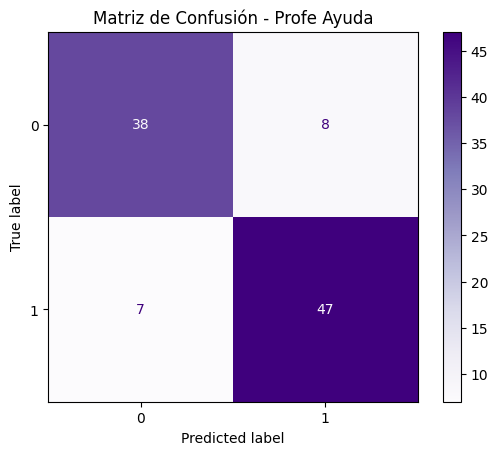

In [3]:
# ===============================================================
# 📈 3. Métricas de Clasificación
# ===============================================================
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print('📊 MÉTRICAS DE CLASIFICACIÓN')
print(f'Accuracy : {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall   : {rec:.2f}')
print(f'F1-Score : {f1:.2f}')

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Matriz de Confusión - Profe Ayuda')
plt.show()


/tmp/ipython-input-3743909074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score'],


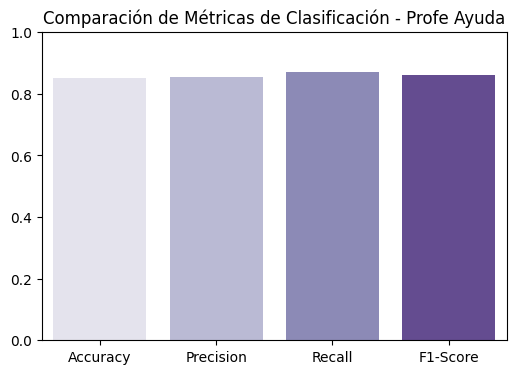

In [4]:
# ===============================================================
# 📊 4. Visualización comparativa de métricas
# ===============================================================
plt.figure(figsize=(6,4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
            y=[acc, prec, rec, f1], palette='Purples')
plt.title('Comparación de Métricas de Clasificación - Profe Ayuda')
plt.ylim(0,1)
plt.show()


In [5]:
# ===============================================================
# 📏 5. Métricas de Regresión
# ===============================================================
y_true_reg = y_true.astype(float)
y_pred_reg = y_pred_scores

mae = mean_absolute_error(y_true_reg, y_pred_reg)
mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_true_reg, y_pred_reg)

print('📈 MÉTRICAS DE REGRESIÓN')
print(f'MAE : {mae:.3f}')
print(f'MSE : {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²  : {r2:.3f}')


📈 MÉTRICAS DE REGRESIÓN
MAE : 0.496
MSE : 0.323
RMSE: 0.568
R²  : -0.301


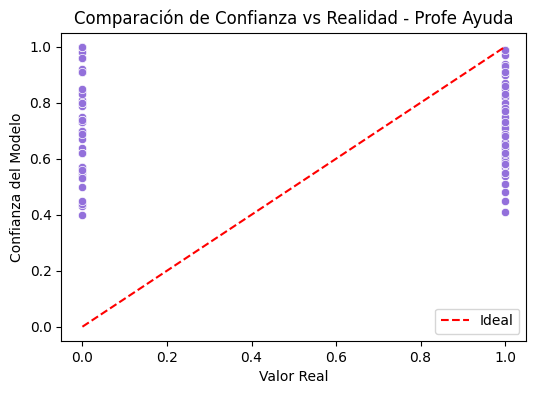

In [6]:
# ===============================================================
# 🎯 6. Visualización de regresión
# ===============================================================
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_true_reg, y=y_pred_reg, color='mediumpurple')
plt.plot([0,1], [0,1], 'r--', label='Ideal')
plt.xlabel('Valor Real')
plt.ylabel('Confianza del Modelo')
plt.title('Comparación de Confianza vs Realidad - Profe Ayuda')
plt.legend()
plt.show()


## ✅ Conclusiones y buenas prácticas
- **Accuracy alto** indica que el modelo acierta en la mayoría de los casos.
- **Precision** mide qué tan confiables son las respuestas positivas.
- **Recall** evalúa si el modelo identifica correctamente todas las respuestas correctas.
- **F1-Score** combina precisión y cobertura.

Para la regresión:
- **MAE y RMSE bajos** indican buena aproximación del nivel de confianza.
- **R² cercano a 1** significa que el modelo explica bien la variabilidad.

### 🧰 Herramientas del PDF:
- scikit-learn ✅
- matplotlib ✅
- seaborn ✅
- MLflow / wandb (opcional)
